<a href="https://colab.research.google.com/github/Junhojuno/keras-tutorial/blob/master/06_RNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Recurrent Neural Network의 기본구조
- sequence 구조의 데이터가 들어간다. (이점은 앞선 feedforward network와 동일 ; feedforward는 앞선 FCN, CNN 등을 의미)
- 차이가 있다면, sequence구조의 데이터를 한번에 처리하지 않는다.
- 네트워크(RNN)가 sequence의 원소를 차례대로 방문하는데, 이때 사용되는 개념이 loop와 state
- (time steps, features)의 2D tensor를 데이터셋으로 받는데,
- 1개의 데이터를 받으면 RNN을 통과시켜 출력을 내는데, 이 출력을 다음 time step의 state로 설정
- 1 timestep != 1 데이터 ; 1개의 데이터는 많은 timestep으로 이루어져 있다. 데이터 하나가 2D tensor형태

```python
###############################################################
state_t = 0 # intial state
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t # 출력이 다음 반복을 위한 state가 된다.
    
###############################################################
# 좀 더 자세히 써보자
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W,input_t) + dot(U,state_t) + b) # 이부분이 좀 새롭다!(input과 state를 연결하여 output을 계산)
    state_t = output_t
###############################################################
```

In [0]:
# simpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 사용할 단어수
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(input_train.shape, input_test.shape) # 그냥 데이터 자체는 list형태
print("훈련 시퀀스 : {}, 테스트 시퀀스 : {}".format(len(input_train), len(input_test)))

print("시퀀스 패딩 ; (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape, input_test.shape) # 단어 인덱스로 만들어줍니다. 리뷰를 [32 7 92 42 12 ....]형태로 만들어준다. ; 텍스트를 숫자 시퀀스 형태로!

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)
훈련 시퀀스 : 25000, 테스트 시퀀스 : 25000
시퀀스 패딩 ; (samples x time)
(25000, 500) (25000, 500)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x=input_train, y=y_train, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.5422 - acc: 0.7079 - val_loss: 0.4353 - val_acc: 0.8108
Epoch 2/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.3431 - acc: 0.8608 - val_loss: 0.4224 - val_acc: 0.8352
Epoch 3/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.2838 - acc: 0.8897 - val_loss: 0.3482 - val_acc: 0.8480
Epoch 4/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.2598 - acc: 0.8989 - val_loss: 0.3585 - val_acc: 0.8620
Epoch 5/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.2129 - acc: 0.9182 - val_loss: 0.4066 - val_acc: 0.8398
Epoch 6/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.1688 - acc: 0.9358 - val_loss: 0.3872 - val_acc: 0.8642
Epo

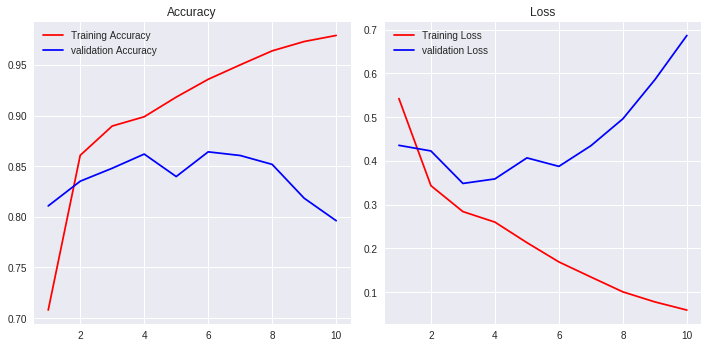

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist.history['acc']) + 1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, hist.history['acc'], 'r-', label="Training Accuracy")
plt.plot(epochs, hist.history['val_acc'], 'b-', label="validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hist.history['loss'], 'r-', label="Training Loss")
plt.plot(epochs, hist.history['val_loss'], 'b-', label="validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

- validation 성능이 86%정도 나왔다. FCN보다 성능이 떨어진다.
- 그 이유는 FCN보다 얻은 정보가 적다.(처음 500개 이후 단어는 잘림)
- simpleRNN구조는 긴 시퀀스를 처리하는데 적합하지 않다. (Gradient Vanishing Problem을 가지고 있음) 
- 이론적으로 모든 timestep의 정보를 여기선 유지할 수 없다.(긴 시간에 걸친 의존성을 학습할 수 없다.)
- Backpropagation시  timestep마다 동일한 가중치를 곱하는 데,
- 이때 가중치의 크기에 따라 gradient vanishing되거나 exploding된다.
- 이 문제를 해결한게 LSTM, GRU